In [1]:
# Common imports
import numpy as np
import os
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
wine = pd.read_csv("winedata.csv", delimiter=';', error_bad_lines=False)

b'Skipping line 3149: expected 12 fields, saw 13\nSkipping line 4821: expected 12 fields, saw 13\n'


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4892 non-null float64
volatile acidity        4892 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4891 non-null object
free sulfur dioxide     4889 non-null object
total sulfur dioxide    4890 non-null object
density                 4891 non-null object
pH                      4891 non-null object
sulphates               4893 non-null object
alcohol                 4891 non-null object
quality                 4893 non-null object
dtypes: float64(1), object(11)
memory usage: 459.3+ KB


In [8]:
drop_high = wine[(wine['quality'] == 'high') | (wine['quality']== 'low') | (wine['quality']== ' ') ].index
#drop_low = wine[wine['quality']== 'low'].index
wine_no_high = wine.drop(drop_high)
wine_clean = wine_no_high.dropna()
#wine_nostr = wine_no_high.drop(drop_low)
wine_float = wine_clean.astype(float)
#wine___nostr = wine.dropna()

In [9]:
wine.describe()

,fixed acidity
count,4892.000000
mean,6.855100
std,0.843951
min,3.800000
25%,6.300000
50%,6.800000
75%,7.300000
max,14.200000


In [10]:
wine_clean['quality'].value_counts()

6    2132
5    1407
7     843
8     171
4     159
3      19
9       5
Name: quality, dtype: int64

In [11]:
wine_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4736 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4736 non-null float64
volatile acidity        4736 non-null float64
citric acid             4736 non-null float64
residual sugar          4736 non-null float64
chlorides               4736 non-null float64
free sulfur dioxide     4736 non-null float64
total sulfur dioxide    4736 non-null float64
density                 4736 non-null float64
pH                      4736 non-null float64
sulphates               4736 non-null float64
alcohol                 4736 non-null float64
quality                 4736 non-null float64
dtypes: float64(12)
memory usage: 481.0 KB


In [12]:
wine_float.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000
mean,6.856197,0.277719,0.334388,6.401024,0.045863,35.350084,138.473395,0.994037,3.188547,0.489962,10.511218,5.877111
std,0.844487,0.100313,0.121084,5.091559,0.021971,17.036944,42.543137,0.002998,0.151226,0.114152,1.226792,0.885705
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993780,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


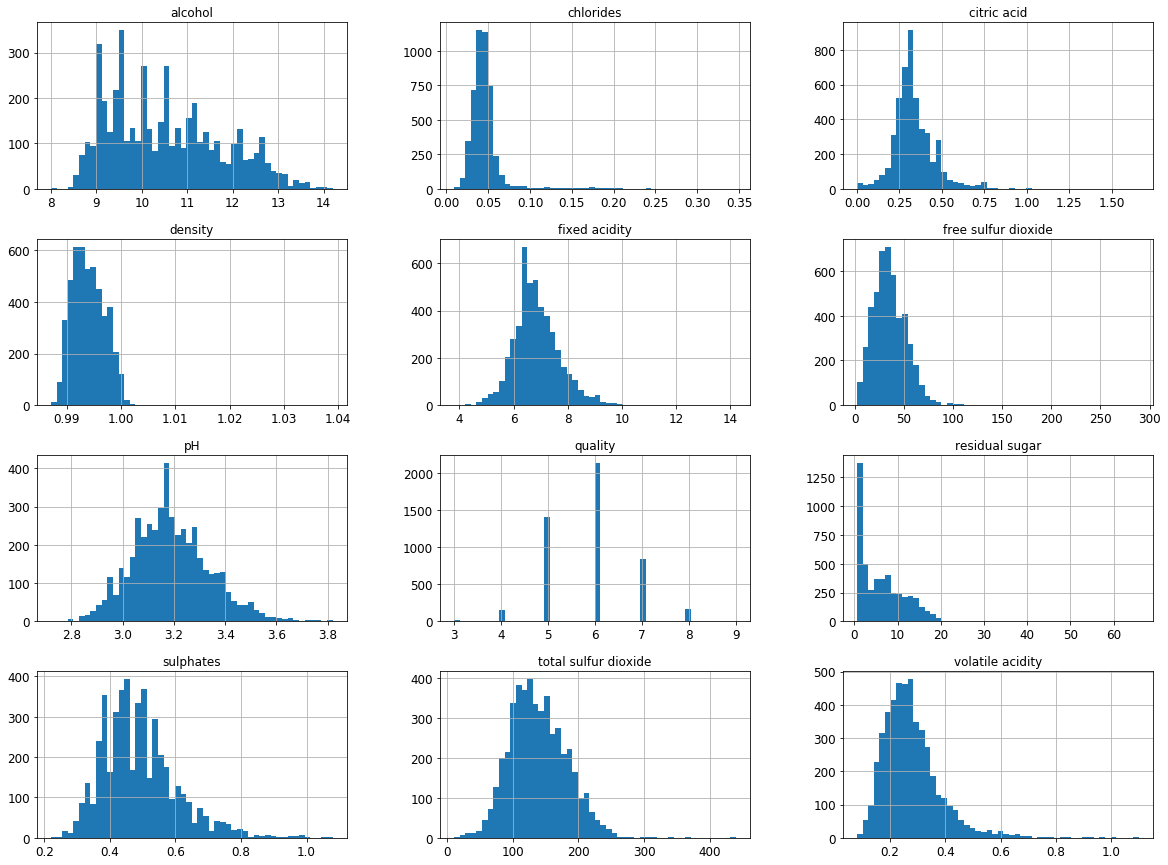

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
wine_float.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
corr_matrix = wine_float.corr()

In [15]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.432733
pH                      0.096504
sulphates               0.054807
free sulfur dioxide     0.007281
citric acid            -0.007378
residual sugar         -0.097953
fixed acidity          -0.115778
total sulfur dioxide   -0.177521
volatile acidity       -0.201044
chlorides              -0.207202
density                -0.305599
Name: quality, dtype: float64

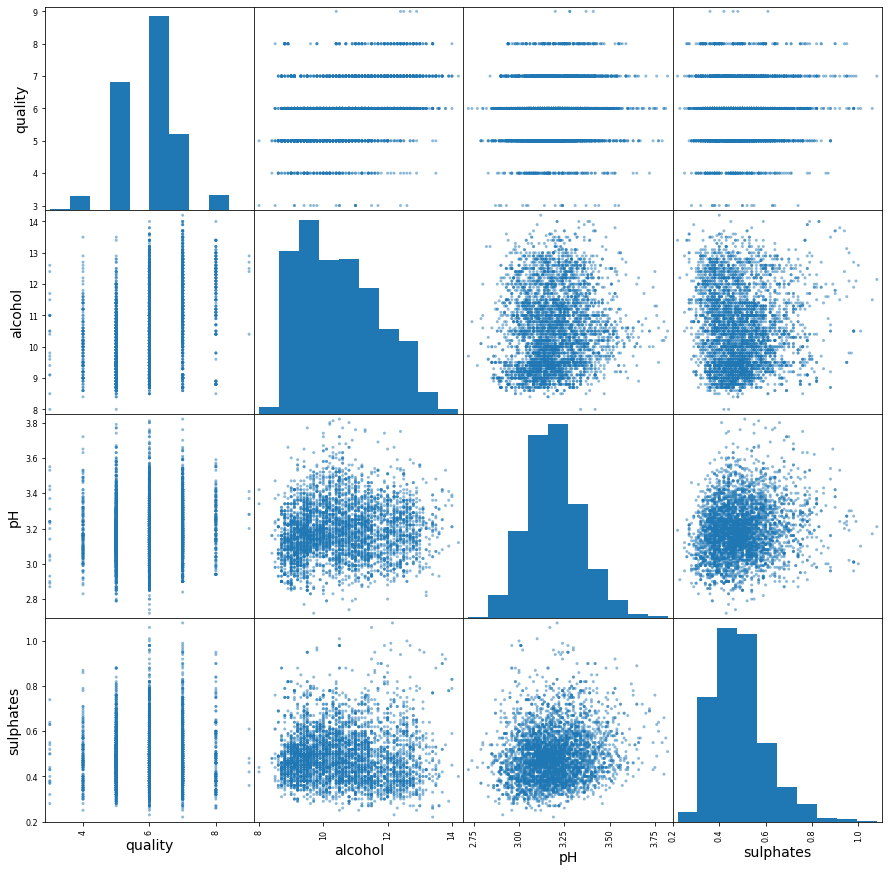

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["quality", "alcohol", "pH",
              "sulphates"]
scatter_matrix(wine_float[attributes], figsize=(15, 15))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine_float, test_size=0.2, random_state=42)

In [18]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
777,7.2,0.23,0.19,13.7,0.052,47.0,197.0,0.99865,3.12,0.53,9.0,5.0
2391,6.5,0.24,0.29,8.2,0.043,32.0,156.0,0.99453,3.13,0.70,10.1,6.0
2304,7.5,0.42,0.20,1.4,0.060,15.0,168.0,0.99440,3.06,0.40,9.4,6.0
3469,7.6,0.22,0.28,12.0,0.056,68.0,143.0,0.99830,2.99,0.30,9.2,6.0
2687,6.6,0.24,0.38,8.0,0.042,56.0,187.0,0.99577,3.21,0.46,9.2,5.0


In [26]:
predict_median = train_set['quality'].median()

In [54]:
predict_median1 = np.ones(3788)
predict_median = np.multiply(predict_median1, 6)
print(predict_median)
print(predict_median.shape)

[6. 6. 6. ... 6. 6. 6.]
(3788,)


In [50]:
wine_tr = train_set.drop('quality', axis=1)
wine_tr_labels = train_set['quality'].copy()
wine_tr_np = wine_tr.to_numpy()
wine_tr_l_np = wine_tr_labels.to_numpy()
wine_tr_l_np.shape
print(wine_tr_l_np)
print(wine_tr_l_np.shape)

[5. 6. 6. ... 7. 7. 6.]
(3788,)


In [55]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(wine_tr_l_np, predict_median)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.88903920470211

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_tr, wine_tr_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
wine_predictions = lin_reg.predict(wine_tr)
lin_mse = mean_squared_error(wine_tr_labels, wine_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7470021867494363

In [64]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(wine_tr,wine_tr_labels)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [65]:
wine_predictions1 = neigh.predict(wine_tr)
lin_mse = mean_squared_error(wine_tr_labels, wine_predictions1)
lin_rmse1 = np.sqrt(lin_mse)
lin_rmse1

0.4527575955607031

In [66]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_tr,wine_tr_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [68]:
housing_predictions2 = tree_reg.predict(wine_tr)
tree_mse = mean_squared_error(wine_tr_labels, housing_predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [69]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_tr, wine_tr_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [70]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.91455542 0.91166582 0.81703499 0.8154187  0.87171925 0.85490977
 0.88075286 0.8956064  0.81811501 0.8229512 ]
Mean: 0.8602729407454938
Standard deviation: 0.03803564628779578


In [71]:
lin_scores = cross_val_score(lin_reg, wine_tr, wine_tr_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.75901811 0.728429   0.7218649  0.74697903 0.79938527 0.72503168
 0.79287262 0.78801107 0.72664333 0.73561509]
Mean: 0.7523850098974597
Standard deviation: 0.028962296389429702


In [72]:
neigh_scores = cross_val_score(neigh, wine_tr, wine_tr_labels,
                             scoring="neg_mean_squared_error", cv=10)
neigh_rmse_scores = np.sqrt(-neigh_scores)
display_scores(neigh_rmse_scores)

Scores: [0.83736929 0.88337026 0.82985201 0.85683655 0.92566741 0.79119495
 0.89080616 0.90184507 0.78931355 0.80466563]
Mean: 0.8510920873074952
Standard deviation: 0.045813272385428365
